# DATA EXPLORATORY ANALYSIS AND HYPOTHESIS
# TESTING FOR  INSURANCE CLAIMS DATA

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
from scipy.stats import chi2_contingency

In [63]:
claims=pd.read_csv('F:\Analytix_Labs\Python for data science\Case_Study\Python Foundation Case Study 3 - Insurance Claims Case Study\claims.csv')
print(claims)

      claim_id  customer_id      incident_cause  claim_date claim_area  \
0     54004764     21868593        Driver error  11/27/2017       Auto   
1     33985796     75740424               Crime  10/03/2018       Home   
2     53522022     30308357  Other driver error  02/02/2018       Auto   
3     13015401     47830476      Natural causes  06/17/2018       Auto   
4     22890252     19269962               Crime  01/13/2018       Auto   
...        ...          ...                 ...         ...        ...   
1095  97727122     35951012  Other driver error  06/11/2017       Auto   
1096  10247193     14818669      Natural causes  03/14/2018       Auto   
1097  79807493     85322831  Other driver error  02/09/2018       Auto   
1098  69299345     73449366        Other causes  03/21/2018       Auto   
1099  58809728     43020876  Other driver error  06/04/2017       Auto   

     police_report           claim_type claim_amount  total_policy_claims  \
0               No        Material

In [64]:
cust_demo =pd.read_csv('F:\Analytix_Labs\Python for data science\Case_Study\Python Foundation Case Study 3 - Insurance Claims Case Study\cust_demographics.csv')
print(cust_demo)

       CUST_ID  gender DateOfBirth State       Contact   Segment
0     21868593  Female   12-Jan-79    VT  789-916-8172  Platinum
1     75740424  Female   13-Jan-70    ME  265-543-1264    Silver
2     30308357  Female   11-Mar-84    TN  798-631-4758    Silver
3     47830476  Female   01-May-86    MA  413-187-7945    Silver
4     19269962    Male   13-May-77    NV  956-871-8691      Gold
...        ...     ...         ...   ...           ...       ...
1080  79539873  Female   15-Mar-81    ND  459-425-4319  Platinum
1081  42364152  Female   07-Jul-96    ID  529-462-1635    Silver
1082  19888166    Male   11-Apr-90    WI  712-651-9613      Gold
1083  11256802  Female   22-Oct-64    LA  469-345-5617    Silver
1084  61575264    Male   12-Jul-95    WY  182-385-1392      Gold

[1085 rows x 6 columns]


In [65]:
claims.rename(columns = {'customer_id':'CUST_ID'}, inplace = True)

In [66]:
claims.columns

Index(['claim_id', 'CUST_ID', 'incident_cause', 'claim_date', 'claim_area',
       'police_report', 'claim_type', 'claim_amount', 'total_policy_claims',
       'fraudulent'],
      dtype='object')

In [67]:
data= pd.merge(claims,cust_demo,on = 'CUST_ID',how='inner')
print(data)

      claim_id   CUST_ID      incident_cause  claim_date claim_area  \
0     54004764  21868593        Driver error  11/27/2017       Auto   
1     33985796  75740424               Crime  10/03/2018       Home   
2     53522022  30308357  Other driver error  02/02/2018       Auto   
3     63017412  30308357        Driver error  04/04/2018       Auto   
4     13015401  47830476      Natural causes  06/17/2018       Auto   
...        ...       ...                 ...         ...        ...   
1080  62020796  79539873  Other driver error  09/06/2018       Auto   
1081  63269067  42364152        Other causes  05/09/2017       Home   
1082  22690595  19888166  Other driver error  05/15/2017       Auto   
1083  12376894  11256802  Other driver error  04/18/2017       Auto   
1084  63226031  61575264      Natural causes  03/16/2017       Auto   

     police_report     claim_type claim_amount  total_policy_claims  \
0               No  Material only        $2980                  1.0   
1    

### 2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes ### of the columns and their business significance.

In [68]:
data.dtypes

claim_id                 int64
CUST_ID                  int64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
dtype: object

In [69]:
from datetime import datetime

In [70]:
data['claim_date'] = pd.to_datetime(data['claim_date'],format='%m/%d/%Y')

In [71]:
data.dtypes

claim_id                        int64
CUST_ID                         int64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                   object
total_policy_claims           float64
fraudulent                     object
gender                         object
DateOfBirth                    object
State                          object
Contact                        object
Segment                        object
dtype: object

In [72]:
data.head()

,claim_id,CUST_ID,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,$2980,1.0,No,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,$2980,3.0,No,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,$3369.5,1.0,Yes,Female,11-Mar-84,TN,798-631-4758,Silver
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,$1950,6.0,No,Female,11-Mar-84,TN,798-631-4758,Silver
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,$1680,1.0,No,Female,01-May-86,MA,413-187-7945,Silver


In [73]:
data['DateOfBirth'] = pd.to_datetime(data['DateOfBirth'],format='%d-%b-%y')

In [74]:
data.loc[(data.DateOfBirth.dt.year > 2020),"DateOfBirth"]=data[data.DateOfBirth.dt.year > 2020]["DateOfBirth"].apply(lambda x: x - pd.DateOffset(years=100))

In [75]:
data.dtypes

claim_id                        int64
CUST_ID                         int64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                   object
total_policy_claims           float64
fraudulent                     object
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                        object
Segment                        object
dtype: object

In [76]:
data.head()

,claim_id,CUST_ID,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,$2980,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,$2980,3.0,No,Female,1970-01-13,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,$3369.5,1.0,Yes,Female,1984-03-11,TN,798-631-4758,Silver
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,$1950,6.0,No,Female,1984-03-11,TN,798-631-4758,Silver
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,$1680,1.0,No,Female,1986-05-01,MA,413-187-7945,Silver


In [77]:
data['total_policy_claims'] = data['total_policy_claims'].fillna(0).astype(int)
data['gender'] = data['gender'].astype(str)
data['State'] = data['State'].astype(str)

In [78]:
data.dtypes

claim_id                        int64
CUST_ID                         int64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                   object
total_policy_claims             int32
fraudulent                     object
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                        object
Segment                        object
dtype: object

In [79]:
data.head()

,claim_id,CUST_ID,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,$2980,1,No,Female,1979-01-12,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,$2980,3,No,Female,1970-01-13,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,$3369.5,1,Yes,Female,1984-03-11,TN,798-631-4758,Silver
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,$1950,6,No,Female,1984-03-11,TN,798-631-4758,Silver
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,$1680,1,No,Female,1986-05-01,MA,413-187-7945,Silver


In [80]:
data.isnull().sum()

claim_id                0
CUST_ID                 0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims     0
fraudulent              0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
dtype: int64

### 3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the sign $

In [81]:
data['Contact'] = pd.to_numeric(data.Contact.str.replace("-",""),downcast='float')
data['claim_amount'] = pd.to_numeric(data.claim_amount.str.replace("$",""),downcast='float')

<ipython-input-81-1f7c3c23d824>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data['claim_amount'] = pd.to_numeric(data.claim_amount.str.replace("$",""),downcast='float')


In [82]:
data.head(50)

,claim_id,CUST_ID,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1,No,Female,1979-01-12,VT,7.899168e+09,Platinum
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3,No,Female,1970-01-13,ME,2.655431e+09,Silver
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1,Yes,Female,1984-03-11,TN,7.986315e+09,Silver
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6,No,Female,1984-03-11,TN,7.986315e+09,Silver
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1,No,Female,1986-05-01,MA,4.131878e+09,Silver
5,91609100,47830476,Natural causes,2017-04-12,Auto,Unknown,Material only,1440.0,1,No,Female,1986-05-01,MA,4.131878e+09,Silver
6,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1,No,Male,1977-05-13,NV,9.568719e+09,Gold
7,39219616,19269962,Other causes,2018-09-26,Auto,No,Material only,2240.0,2,No,Male,1977-05-13,NV,9.568719e+09,Gold
8,24050443,21831191,Other driver error,2017-10-04,Auto,No,Injury only,38306.5,3,Yes,Male,1977-05-17,NH,4.197128e+09,Gold
9,91475471,21831191,Driver error,2018-02-09,Auto,Unknown,Material and injury,36810.0,1,No,Male,1977-05-17,NH,4.197128e+09,Gold


In [83]:
data.isnull().sum()

claim_id                0
CUST_ID                 0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims     0
fraudulent              0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
dtype: int64

In [84]:
data.dtypes

claim_id                        int64
CUST_ID                         int64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                  float32
total_policy_claims             int32
fraudulent                     object
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                       float32
Segment                        object
dtype: object

### 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [85]:
#data['flag'] = np.where( data.police_report == "No",'0','1')

In [86]:
data['flag'] = np.where(data.police_report == "No", 0 ,np.where(data.police_report == "Yes", 1,np.nan))

In [87]:
data.head(10)

,claim_id,CUST_ID,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,flag
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1,No,Female,1979-01-12,VT,7.899168e+09,Platinum,0.0
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3,No,Female,1970-01-13,ME,2.655431e+09,Silver,NaN
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1,Yes,Female,1984-03-11,TN,7.986315e+09,Silver,0.0
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6,No,Female,1984-03-11,TN,7.986315e+09,Silver,0.0
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1,No,Female,1986-05-01,MA,4.131878e+09,Silver,0.0
5,91609100,47830476,Natural causes,2017-04-12,Auto,Unknown,Material only,1440.0,1,No,Female,1986-05-01,MA,4.131878e+09,Silver,NaN
6,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1,No,Male,1977-05-13,NV,9.568719e+09,Gold,0.0
7,39219616,19269962,Other causes,2018-09-26,Auto,No,Material only,2240.0,2,No,Male,1977-05-13,NV,9.568719e+09,Gold,0.0
8,24050443,21831191,Other driver error,2017-10-04,Auto,No,Injury only,38306.5,3,Yes,Male,1977-05-17,NH,4.197128e+09,Gold,0.0
9,91475471,21831191,Driver error,2018-02-09,Auto,Unknown,Material and injury,36810.0,1,No,Male,1977-05-17,NH,4.197128e+09,Gold,NaN


In [88]:
print(data)

      claim_id   CUST_ID      incident_cause claim_date claim_area  \
0     54004764  21868593        Driver error 2017-11-27       Auto   
1     33985796  75740424               Crime 2018-10-03       Home   
2     53522022  30308357  Other driver error 2018-02-02       Auto   
3     63017412  30308357        Driver error 2018-04-04       Auto   
4     13015401  47830476      Natural causes 2018-06-17       Auto   
...        ...       ...                 ...        ...        ...   
1080  62020796  79539873  Other driver error 2018-09-06       Auto   
1081  63269067  42364152        Other causes 2017-05-09       Home   
1082  22690595  19888166  Other driver error 2017-05-15       Auto   
1083  12376894  11256802  Other driver error 2017-04-18       Auto   
1084  63226031  61575264      Natural causes 2017-03-16       Auto   

     police_report     claim_type  claim_amount  total_policy_claims  \
0               No  Material only        2980.0                    1   
1          Unkn

### 5. One customer can claim for insurance more than once and in each claim,multiple categories of claims can be involved. However, customer ID should remain unique. Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.

In [89]:
data.groupby('CUST_ID').first().reset_index(drop = True)

,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,flag
0,69348631,Driver error,2018-04-10,Auto,No,Injury only,NaN,1,Yes,Female,1978-05-23,DE,9.628791e+09,Platinum,0.0
1,40953049,Other causes,2018-04-04,Auto,No,Material and injury,39192.0,1,Yes,Male,1972-12-20,TX,1.738926e+09,Silver,0.0
2,45780237,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.5,2,Yes,Male,1988-07-28,FL,3.645981e+09,Silver,NaN
3,89833962,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.0,1,No,Male,1971-08-19,CA,1.873488e+09,Gold,1.0
4,35782742,Other driver error,2018-07-27,Auto,No,Injury only,35250.0,3,No,Female,1980-08-10,NC,7.988625e+09,Gold,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,4549014,Other causes,2018-07-07,Auto,No,Injury only,21480.0,1,No,Male,1965-01-28,UT,5.175625e+09,Silver,0.0
1074,35453672,Natural causes,2018-01-06,Auto,Yes,Material and injury,14360.0,1,No,Female,1966-06-19,HI,4.577521e+09,Gold,1.0
1075,37305754,Natural causes,2018-04-04,Auto,No,Material only,1242.0,1,Yes,Female,1963-11-18,NC,6.432465e+09,Silver,0.0
1076,22960702,Driver error,2017-11-13,Auto,No,Material only,2415.0,2,Yes,Male,1995-06-08,OR,3.952466e+09,Gold,0.0


### 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [90]:
# Missing value imputation for continuous variables
def missing_imputation( x, stats = 'mean' ):
    if (x.dtypes == 'float64') | (x.dtypes == 'int64'):
        x = x.fillna(x.mean()) if stats == 'mean' else x.fillna(x.mode())
    return x

In [91]:
cat_columns = ["gender","State","Segment","incident_cause","claim_area","claim_type","fraudulent","flag"]
con_columns = ["claim_amount"]

In [92]:
# numeric columns
data.fillna(data.select_dtypes(include='number').mean().iloc[0],inplace=True)

# categorical columns
data.fillna(data.select_dtypes(include='object').mode().iloc[0], inplace=True)

### 7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria Children < 18 Youth 18-30 Adult 30-60 Senior > 60

In [93]:
data.head(50)

,claim_id,CUST_ID,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,flag
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1,No,Female,1979-01-12,VT,7.899168e+09,Platinum,0.000000e+00
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3,No,Female,1970-01-13,ME,2.655431e+09,Silver,4.891553e+07
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1,Yes,Female,1984-03-11,TN,7.986315e+09,Silver,0.000000e+00
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6,No,Female,1984-03-11,TN,7.986315e+09,Silver,0.000000e+00
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1,No,Female,1986-05-01,MA,4.131878e+09,Silver,0.000000e+00
5,91609100,47830476,Natural causes,2017-04-12,Auto,Unknown,Material only,1440.0,1,No,Female,1986-05-01,MA,4.131878e+09,Silver,4.891553e+07
6,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1,No,Male,1977-05-13,NV,9.568719e+09,Gold,0.000000e+00
7,39219616,19269962,Other causes,2018-09-26,Auto,No,Material only,2240.0,2,No,Male,1977-05-13,NV,9.568719e+09,Gold,0.000000e+00
8,24050443,21831191,Other driver error,2017-10-04,Auto,No,Injury only,38306.5,3,Yes,Male,1977-05-17,NH,4.197128e+09,Gold,0.000000e+00
9,91475471,21831191,Driver error,2018-02-09,Auto,Unknown,Material and injury,36810.0,1,No,Male,1977-05-17,NH,4.197128e+09,Gold,4.891553e+07


In [94]:
data['DateOfBirth'] = data['DateOfBirth'].astype("str")

In [95]:
data['Age'] = data['DateOfBirth']

In [96]:
data.head()

,claim_id,CUST_ID,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,flag,Age
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1,No,Female,1979-01-12,VT,7.899168e+09,Platinum,0.000000e+00,1979-01-12
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3,No,Female,1970-01-13,ME,2.655431e+09,Silver,4.891553e+07,1970-01-13
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1,Yes,Female,1984-03-11,TN,7.986315e+09,Silver,0.000000e+00,1984-03-11
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6,No,Female,1984-03-11,TN,7.986315e+09,Silver,0.000000e+00,1984-03-11
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1,No,Female,1986-05-01,MA,4.131878e+09,Silver,0.000000e+00,1986-05-01


In [97]:
data.dtypes

claim_id                        int64
CUST_ID                         int64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                  float32
total_policy_claims             int32
fraudulent                     object
gender                         object
DateOfBirth                    object
State                          object
Contact                       float32
Segment                        object
flag                          float64
Age                            object
dtype: object

In [98]:
from datetime import datetime, date

In [99]:
def age(born):
    born = datetime.strptime(born,"%Y-%m-%d").date()
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))
  
data['Age'] = data['Age'].apply(age)
  
display(data)

,claim_id,CUST_ID,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,flag,Age
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1,No,Female,1979-01-12,VT,7.899168e+09,Platinum,0.000000e+00,43
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3,No,Female,1970-01-13,ME,2.655431e+09,Silver,4.891553e+07,52
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1,Yes,Female,1984-03-11,TN,7.986315e+09,Silver,0.000000e+00,37
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6,No,Female,1984-03-11,TN,7.986315e+09,Silver,0.000000e+00,37
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1,No,Female,1986-05-01,MA,4.131878e+09,Silver,0.000000e+00,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1,No,Female,1981-03-15,ND,4.594254e+09,Platinum,1.000000e+00,40
1081,63269067,42364152,Other causes,2017-05-09,Home,No,Material only,2800.0,1,No,Female,1996-07-07,ID,5.294622e+09,Silver,0.000000e+00,25
1082,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2,No,Male,1990-04-11,WI,7.126520e+09,Gold,1.000000e+00,31
1083,12376894,11256802,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4,No,Female,1964-10-22,LA,4.693456e+09,Silver,0.000000e+00,57


In [100]:
data['Age_group'] = np.where(data.Age < 18, "Children",np.where(data.Age < 30, "Youth",
                        np.where(data.Age < 60, "Adult",
                          np.where(data.Age < 100, "Senior", "NaN"))))
data['Age_group'] = data['Age_group'].fillna(data['Age_group'].mode())

In [101]:
display(data)

,claim_id,CUST_ID,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,flag,Age,Age_group
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1,No,Female,1979-01-12,VT,7.899168e+09,Platinum,0.000000e+00,43,Adult
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3,No,Female,1970-01-13,ME,2.655431e+09,Silver,4.891553e+07,52,Adult
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1,Yes,Female,1984-03-11,TN,7.986315e+09,Silver,0.000000e+00,37,Adult
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6,No,Female,1984-03-11,TN,7.986315e+09,Silver,0.000000e+00,37,Adult
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1,No,Female,1986-05-01,MA,4.131878e+09,Silver,0.000000e+00,35,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1,No,Female,1981-03-15,ND,4.594254e+09,Platinum,1.000000e+00,40,Adult
1081,63269067,42364152,Other causes,2017-05-09,Home,No,Material only,2800.0,1,No,Female,1996-07-07,ID,5.294622e+09,Silver,0.000000e+00,25,Youth
1082,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2,No,Male,1990-04-11,WI,7.126520e+09,Gold,1.000000e+00,31,Adult
1083,12376894,11256802,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4,No,Female,1964-10-22,LA,4.693456e+09,Silver,0.000000e+00,57,Adult


### 8. What is the average amount claimed by the customers from various segments?

In [102]:
data.groupby(by = 'Segment')[['claim_amount']].mean().reset_index()

,Segment,claim_amount
0,Gold,2881809.250
1,Platinum,2038711.875
2,Silver,3946937.500


### 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [103]:
data.loc[data.claim_date < "2018-09-10",:].groupby('incident_cause')['claim_amount'].sum().reset_index()

,incident_cause,claim_amount
0,Crime,245239744.0
1,Driver error,590156672.0
2,Natural causes,441441664.0
3,Other causes,932883136.0
4,Other driver error,639058560.0


### 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes? 

In [104]:
data.loc[(data.incident_cause.str.contains("driver") & ((data.State == "TX") | (data.State == "DE") |
                (data.State == "AK"))),:].groupby(by = 'State')['State'].count()

State
AK    4
DE    5
TX    4
Name: State, dtype: int64

### 11.  Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

In [105]:
claims_amount = data.groupby(['gender','Segment']).agg(Total_Claim = ('claim_amount','sum'))

In [106]:
claims_amount['Total_Claim']=claims_amount['Total_Claim'].astype(int)
claims_amount

Total_Claim
gender Segment              
Female Gold        442237280
       Platinum    344690912
       Silver      637641728
Male   Gold        638441152
       Platinum    393322784
       Silver      735892544

<AxesSubplot:ylabel='Total_Claim'>

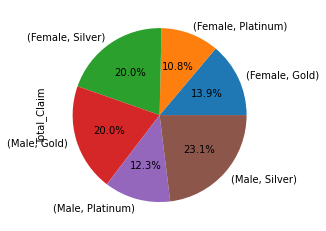

In [107]:
claims_amount['Total_Claim'].plot.pie(autopct='%1.1f%%')

### 12.  Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

In [108]:
claimed=data.loc[(data.incident_cause.str.contains("driver"))].groupby(by = 'gender')['gender'].count()
claimed

gender
Female    149
Male       96
Name: gender, dtype: int64

In [109]:
print(claimed)

gender
Female    149
Male       96
Name: gender, dtype: int64


<AxesSubplot:xlabel='gender'>

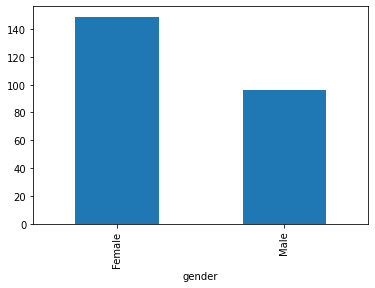

In [110]:
claimed.plot.bar()

In [53]:
#Female has clamied more amount

### 13.  Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

In [111]:
data.head(5)

,claim_id,CUST_ID,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,flag,Age,Age_group
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1,No,Female,1979-01-12,VT,7.899168e+09,Platinum,0.000000e+00,43,Adult
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3,No,Female,1970-01-13,ME,2.655431e+09,Silver,4.891553e+07,52,Adult
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1,Yes,Female,1984-03-11,TN,7.986315e+09,Silver,0.000000e+00,37,Adult
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6,No,Female,1984-03-11,TN,7.986315e+09,Silver,0.000000e+00,37,Adult
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1,No,Female,1986-05-01,MA,4.131878e+09,Silver,0.000000e+00,35,Adult


<AxesSubplot:xlabel='Age_group'>

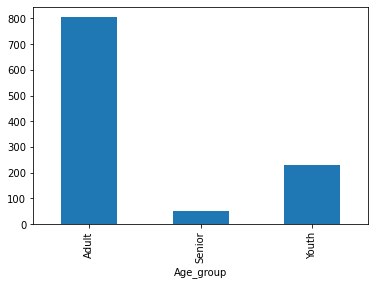

In [112]:
data.groupby(by='Age_group')['fraudulent'].count().plot.bar()

In [56]:
#Adult 🧑 has maximum fraudulent policy claims

### Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

In [113]:
data['claim_date'] = pd.to_datetime(data['claim_date'])

In [115]:
data['Claim_month'] = data['claim_date'].dt.month

In [116]:
data.head(10)

,claim_id,CUST_ID,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,flag,Age,Age_group,Claim_month
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1,No,Female,1979-01-12,VT,7.899168e+09,Platinum,0.000000e+00,43,Adult,11
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3,No,Female,1970-01-13,ME,2.655431e+09,Silver,4.891553e+07,52,Adult,10
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1,Yes,Female,1984-03-11,TN,7.986315e+09,Silver,0.000000e+00,37,Adult,2
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6,No,Female,1984-03-11,TN,7.986315e+09,Silver,0.000000e+00,37,Adult,4
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1,No,Female,1986-05-01,MA,4.131878e+09,Silver,0.000000e+00,35,Adult,6
5,91609100,47830476,Natural causes,2017-04-12,Auto,Unknown,Material only,1440.0,1,No,Female,1986-05-01,MA,4.131878e+09,Silver,4.891553e+07,35,Adult,4
6,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1,No,Male,1977-05-13,NV,9.568719e+09,Gold,0.000000e+00,44,Adult,1
7,39219616,19269962,Other causes,2018-09-26,Auto,No,Material only,2240.0,2,No,Male,1977-05-13,NV,9.568719e+09,Gold,0.000000e+00,44,Adult,9
8,24050443,21831191,Other driver error,2017-10-04,Auto,No,Injury only,38306.5,3,Yes,Male,1977-05-17,NH,4.197128e+09,Gold,0.000000e+00,44,Adult,10
9,91475471,21831191,Driver error,2018-02-09,Auto,Unknown,Material and injury,36810.0,1,No,Male,1977-05-17,NH,4.197128e+09,Gold,4.891553e+07,44,Adult,2


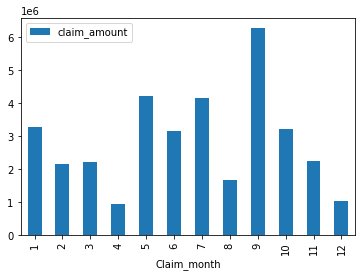

In [117]:
pd.pivot_table(data,index="Claim_month",values="claim_amount").plot(kind='bar')
plt.show()

### 15.  What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet thatrepresents fraudulent claims and the other for non-fraudulent claims.

In [118]:
Fraud_claims= data.loc[(data.fraudulent=="Yes")].groupby(['gender','Age_group'])[['claim_amount']].mean().reset_index()
Fraud_claims

,gender,Age_group,claim_amount
0,Female,Adult,3.100835e+06
1,Female,Senior,4.387889e+03
2,Female,Youth,8.900314e+06
3,Male,Adult,2.589671e+06
4,Male,Senior,2.823250e+04
5,Male,Youth,4.262613e+06


In [119]:
Non_Frauds_claims=data.loc[(data.fraudulent=="No")].groupby(['gender','Age_group'])[['claim_amount']].mean().reset_index()
Non_Frauds_claims

,gender,Age_group,claim_amount
0,Female,Adult,1.508968e+06
1,Female,Senior,1.439836e+07
2,Female,Youth,2.671037e+06
3,Male,Adult,3.516108e+06
4,Male,Senior,1.376619e+04
5,Male,Youth,3.167238e+06


In [120]:
average_claim_amount=pd.merge(Fraud_claims,Non_Frauds_claims,on=["gender","Age_group"])
print(average_claim_amount)

   gender Age_group  claim_amount_x  claim_amount_y
0  Female     Adult    3.100835e+06    1.508968e+06
1  Female    Senior    4.387889e+03    1.439836e+07
2  Female     Youth    8.900314e+06    2.671037e+06
3    Male     Adult    2.589671e+06    3.516108e+06
4    Male    Senior    2.823250e+04    1.376619e+04
5    Male     Youth    4.262613e+06    3.167238e+06


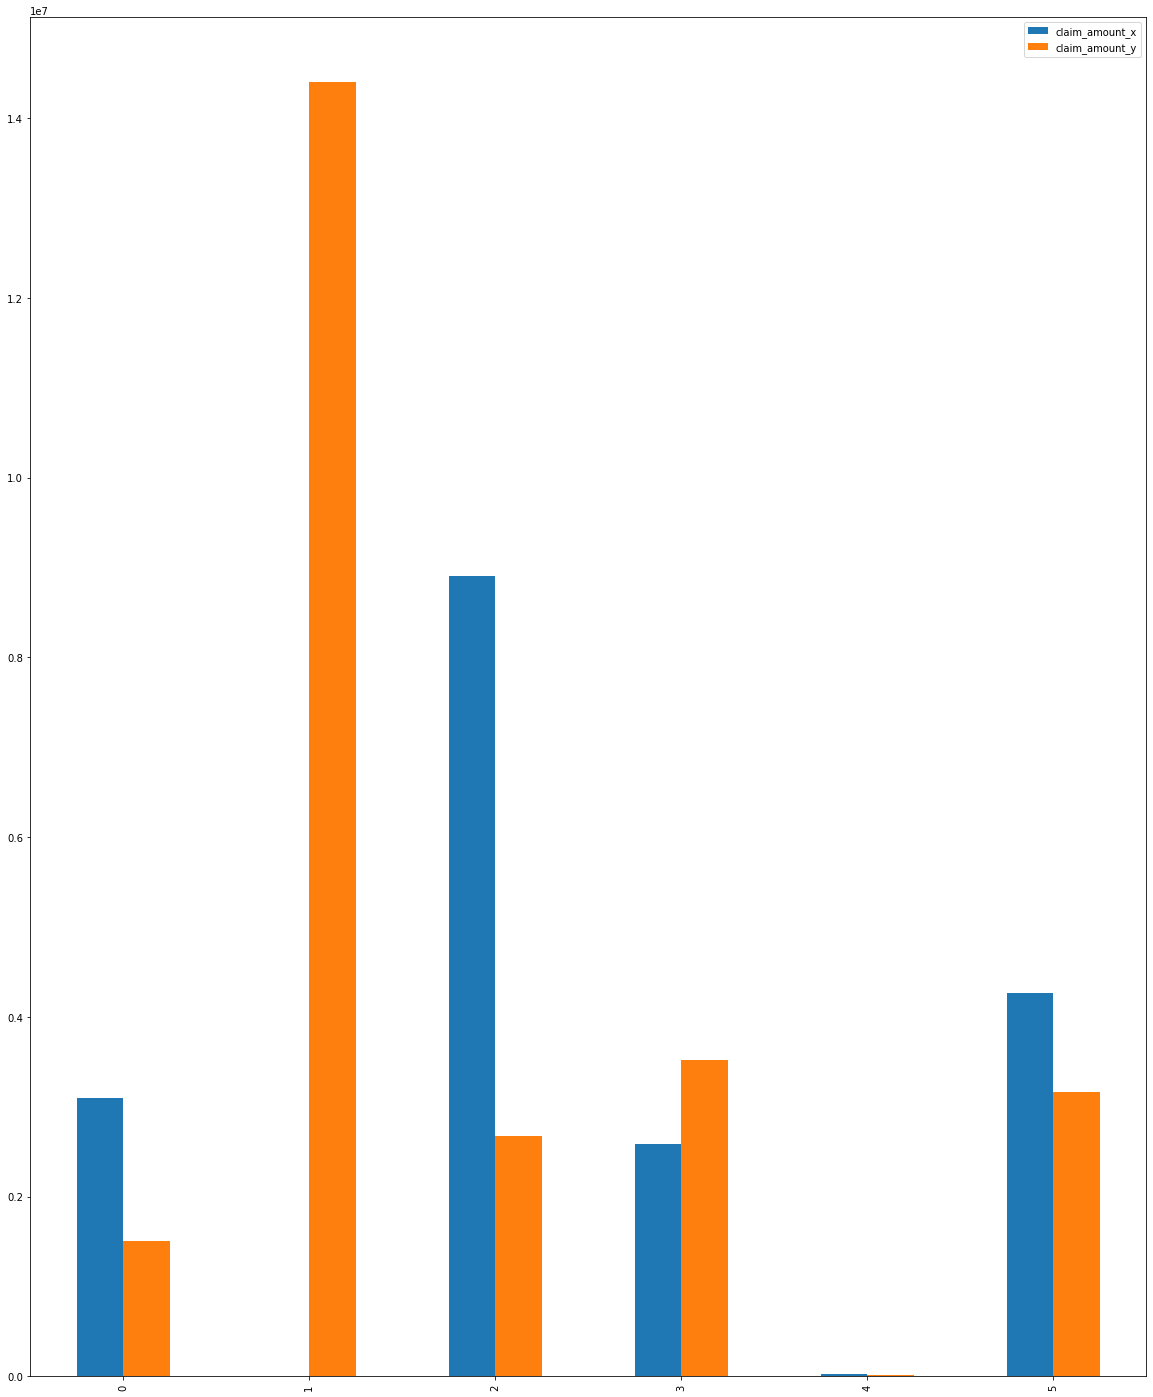

In [121]:
average_claim_amount.plot(kind="bar", subplots= False, legend= True,figsize=(20,25))
plt.show()

### 16.  Is there any similarity in the amount claimed by males and females?

In [122]:
males_claims = data['claim_amount'].loc[data['gender']=="Male"]
female_claims = data['claim_amount'].loc[data['gender']=="Female"]

In [ ]:
H0 - There is a similarity
Ha - There is not a similarity

CI - 95%
p - 0.05

In [123]:
print( 'males_claims:', males_claims.mean(), '| female_claims:',female_claims.mean())

males_claims: 3179239.25 | female_claims: 2692950.25


In [124]:
stats.ttest_ind(males_claims,female_claims) 

Ttest_indResult(statistic=0.6894079853428545, pvalue=0.49071423968195993)

In [ ]:
We will not reject the null hypothesis

### 17.  Is there any relationship between age category and segment?

In [125]:
H0= No relation between category and segment;
Ha= There is a relationship between category and segment
CI - 95%
p - 0.05

SyntaxError: invalid syntax (<ipython-input-125-aa747c891a34>, line 1)

In [126]:
obs_freq = pd.crosstab(data.Age_group,data.Segment)
print(obs_freq)

Segment    Gold  Platinum  Silver
Age_group                        
Adult       285       267     253
Senior       16        17      17
Youth        74        78      78


In [127]:
stats.chi2_contingency(obs_freq)

(1.0805397030766366,
 0.8973473809218607,
 4,
 array([[278.22580645, 268.58064516, 258.19354839],
        [ 17.28110599,  16.68202765,  16.03686636],
        [ 79.49308756,  76.73732719,  73.76958525]]))

In [128]:
c, p, dof, expected = chi2_contingency(obs_freq)

In [129]:
p

0.8973473809218607

In [ ]:
Since the p value of the test is greater than 0.05, we fail reject the null hypothesis.
there is no relationship between age category and segment

### 18.  The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

In [ ]:
H0= No relationship between the 2016-17 claim amounts and current claim amounts
Ha= Retionship exists between the 2016-17 claim amounts and current claim amounts
CI- 95%,
p -0.05

In [130]:
data.head(5)

,claim_id,CUST_ID,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,flag,Age,Age_group,Claim_month
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1,No,Female,1979-01-12,VT,7.899168e+09,Platinum,0.000000e+00,43,Adult,11
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3,No,Female,1970-01-13,ME,2.655431e+09,Silver,4.891553e+07,52,Adult,10
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1,Yes,Female,1984-03-11,TN,7.986315e+09,Silver,0.000000e+00,37,Adult,2
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6,No,Female,1984-03-11,TN,7.986315e+09,Silver,0.000000e+00,37,Adult,4
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1,No,Female,1986-05-01,MA,4.131878e+09,Silver,0.000000e+00,35,Adult,6


In [132]:
data['Year']= data['claim_date'].dt.year

In [133]:
data.head(50)

,claim_id,CUST_ID,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,flag,Age,Age_group,Claim_month,Year
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1,No,Female,1979-01-12,VT,7.899168e+09,Platinum,0.000000e+00,43,Adult,11,2017
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3,No,Female,1970-01-13,ME,2.655431e+09,Silver,4.891553e+07,52,Adult,10,2018
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1,Yes,Female,1984-03-11,TN,7.986315e+09,Silver,0.000000e+00,37,Adult,2,2018
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6,No,Female,1984-03-11,TN,7.986315e+09,Silver,0.000000e+00,37,Adult,4,2018
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1,No,Female,1986-05-01,MA,4.131878e+09,Silver,0.000000e+00,35,Adult,6,2018
5,91609100,47830476,Natural causes,2017-04-12,Auto,Unknown,Material only,1440.0,1,No,Female,1986-05-01,MA,4.131878e+09,Silver,4.891553e+07,35,Adult,4,2017
6,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1,No,Male,1977-05-13,NV,9.568719e+09,Gold,0.000000e+00,44,Adult,1,2018
7,39219616,19269962,Other causes,2018-09-26,Auto,No,Material only,2240.0,2,No,Male,1977-05-13,NV,9.568719e+09,Gold,0.000000e+00,44,Adult,9,2018
8,24050443,21831191,Other driver error,2017-10-04,Auto,No,Injury only,38306.5,3,Yes,Male,1977-05-17,NH,4.197128e+09,Gold,0.000000e+00,44,Adult,10,2017
9,91475471,21831191,Driver error,2018-02-09,Auto,Unknown,Material and injury,36810.0,1,No,Male,1977-05-17,NH,4.197128e+09,Gold,4.891553e+07,44,Adult,2,2018


In [141]:
current_year= data.loc[data.Year == 2018]['claim_amount']
amount= data.loc[(data.Year==2017)|(data.Year==2016)]['claim_amount']

In [142]:
current_year.shape

(487,)

In [144]:
amount.shape

(598,)

In [137]:
current_year.isna().sum()

0

In [ ]:
H0 - u <= 10000
Ha - u > 10000

CI - 95%
p - 0.05

In [145]:
stats.ttest_1samp( amount, 10000)

Ttest_1sampResult(statistic=5.718267046967977, pvalue=1.7019192633731814e-08)

In [ ]:
Output: We accept the H0
    
Business Conclusion:The current year has not shown a significant rise in claim amounts

### 19. Is there any difference between age groups and insurance claims?

In [ ]:
H0:No difference between age groups and insurance claims
Ha:There is some difference between age groups and insurance
CI - 95%
p - 0.05

In [150]:
agegroup_y = data['total_policy_claims'].loc[data['Age_group']=="Youth"]
agegroup_a = data['total_policy_claims'].loc[data['Age_group']=="Adult"]
agegroup_s = data['total_policy_claims'].loc[data['Age_group']=="Senior"]

In [147]:
data.head()

,claim_id,CUST_ID,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,flag,Age,Age_group,Claim_month,Year
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1,No,Female,1979-01-12,VT,7.899168e+09,Platinum,0.000000e+00,43,Adult,11,2017
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3,No,Female,1970-01-13,ME,2.655431e+09,Silver,4.891553e+07,52,Adult,10,2018
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1,Yes,Female,1984-03-11,TN,7.986315e+09,Silver,0.000000e+00,37,Adult,2,2018
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6,No,Female,1984-03-11,TN,7.986315e+09,Silver,0.000000e+00,37,Adult,4,2018
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1,No,Female,1986-05-01,MA,4.131878e+09,Silver,0.000000e+00,35,Adult,6,2018


In [153]:
stats.f_oneway(agegroup_y,agegroup_a,agegroup_s)

F_onewayResult(statistic=0.9639761988985714, pvalue=0.38170073586104936)

In [ ]:
We will accept the null hypothesis

### 20. Is there any relationship between total number of policy claims and the claimed amount?

In [ ]:
data.total_policy_claims.corr(other= Cust_claims.claim_amount)

In [154]:
data['total_policy_claims'].corr(data['claim_amount'])

-0.010827613598083713

In [ ]:
there is no relation between total number of policy claims and the claimed amount correaltion is negative